In [1]:
import os
import cv2
import time
import numpy as np
from shutil import rmtree
from threading import Thread
from matplotlib import pyplot as plt

In [17]:
VAL_RATIO = 0.2
MEANS = (0.406, 0.456, 0.485)
STDS = (0.225, 0.224, 0.229)

In [2]:
def millis():
    return int(time.time() * 1000)

In [4]:
from classification_models.tfkeras import Classifiers
ResNet18, preprocess_input = Classifiers.get('resnet18')

/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/buikhoi/miniconda3/envs/ComputerVision/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [3]:
def get_all_img(images_link):
        # Get all (image, annotation) from path
        img_links = []
        i = 0
        for f1 in os.listdir(images_link):
            new_path_f1 = os.path.join(images_link, f1)
            
            for f2 in os.listdir(new_path_f1):
                new_path_f2 = os.path.join(new_path_f1, f2)
                if any(x not in os.listdir(new_path_f2) for x in ['20.png', '20.jpg']):
                    i += 1
                    continue

                img_link = os.path.join(new_path_f2, '20.jpg')
                anno_link = os.path.join(new_path_f2, '20.png')

                img_links.append((img_link, anno_link))       
        return img_links

In [4]:
images = get_all_img('./../../Data/TUSimple/train_set/clips/')

In [11]:
# def normalize(image, means, stds):
#     new_image = np.empty(image.shape, np.float32)
#     for i in range(3):
#         sub_image = image[:, :, i]
#         sub_image = (sub_image - sub_image.mean()) / sub_image.std() * stds[i] + means[i]
#         new_image[:, :, i] = sub_image
#     return new_image

def normalize(image):
    return (image - image.mean()) / image.std()

In [25]:
target_folder = './training_images/'

if os.path.exists(target_folder + 'train'):
    rmtree(target_folder + 'train')
    
if os.path.exists(target_folder + 'val'):
    rmtree(target_folder + 'val')

os.mkdir(target_folder + 'train')
os.mkdir(target_folder + 'val')

In [26]:
def process_image(image, index):
    print('Processing image {} of {}'.format(idx, len(images)), end='\r')
    new_image = np.empty((288, 800, 4), np.float32)
    img = cv2.imread(image[0])
    img = cv2.resize(img, (800, 288))
    anno = cv2.resize(cv2.imread(image[1]), (800, 288))
    anno[anno>0] = 1
    new_image[:, :, :3] = normalize(img)
    new_image[:, :, -1] = anno[:, :, 0]
    save_path = target_folder
    if np.random.random() < VAL_RATIO:
        save_path += 'val/'
    else:
        save_path += 'train/'
    np.savez_compressed(save_path + str(millis()), image=new_image[:, :, (2, 1, 0, 3)])

In [27]:
processing_threads = []
max_thread = 20
for idx, image in enumerate(images):
    processing_threads.append(Thread(target=process_image, args=[image, idx]))
    processing_threads[-1].start()
    time.sleep(0.0001)
#     break
    if len(processing_threads) == max_thread:
        while all([t.is_alive() for t in processing_threads]):
            time.sleep(0.001)
        
        for t in reversed(processing_threads):
            if not t.is_alive():
                processing_threads.remove(t)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


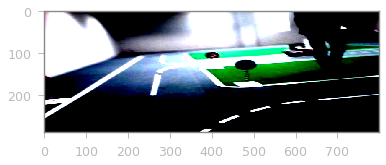

In [33]:
saved_dir = './training_images/train/'
saved_images = [saved_dir + f for f in os.listdir(saved_dir)]
saved_image = np.load(np.random.choice(saved_images))['image']
plt.imshow(saved_image[:, :, :3])

In [47]:
saved_image

array([[[0.2931686 , 0.3770703 , 0.35091096, 0.        ],
        [0.32936177, 0.38874897, 0.37778968, 0.        ],
        [0.45603794, 0.46271378, 0.47378504, 0.        ],
        ...,
        [0.12577508, 0.11235419, 0.0706045 , 0.        ],
        [0.12577508, 0.11235419, 0.0706045 , 0.        ],
        [0.12577508, 0.11235419, 0.0706045 , 0.        ]],

       [[0.29769275, 0.3809632 , 0.39314893, 0.        ],
        [0.4153206 , 0.4782853 , 0.49682394, 0.        ],
        [0.49675527, 0.53667855, 0.5659406 , 0.        ],
        ...,
        [0.12577508, 0.11235419, 0.0706045 , 0.        ],
        [0.12577508, 0.11235419, 0.0706045 , 0.        ],
        [0.12577508, 0.11235419, 0.0706045 , 0.        ]],

       [[0.33388594, 0.3770703 , 0.412348  , 0.        ],
        [0.41984475, 0.45882088, 0.49298412, 0.        ],
        [0.55104506, 0.58728606, 0.62353784, 0.        ],
        ...,
        [0.12577508, 0.11235419, 0.0706045 , 0.        ],
        [0.12577508, 0.112354

In [29]:
for saved_dir in ['./training_images/' + f for f in ['train/', 'val/']]:
    error_count = 0
    saved_images = [saved_dir + f for f in os.listdir(saved_dir)]

    for idx, img in enumerate(saved_images):
        print('Counting image {}'.format(idx), end='\r')
        try:
            np.load(img)['image']
        except:
    #         print('Found a type error image')
            error_count += 1
            os.remove(img)
    print('{} error(s) on a total of {} images'.format(error_count, len(saved_images)))

35 error(s) on a total of 3914 images
4 error(s) on a total of 979 images


In [31]:
rand_image = np.random.choice(saved_images)
image = cv2.imread(rand_image, cv2.IMREAD_UNCHANGED)
try:
    plt.imshow(image[:, :, :3])
except TypeError:
    print(rand_image)

./training_images/val/1607363369995.npz


SyntaxError: invalid syntax (<ipython-input-102-187f4fdf50ef>, line 1)

In [103]:
image = cv2.imread('./training_images/train/1606656473724.png', cv2.IMREAD_UNCHANGED)
plt.imshow(image[:, :, :3])

TypeError: 'NoneType' object is not subscriptable